# Problem 1



## Subproblem 1

We find the following recursive formula: $q_n = p(1-q_{n-1}) + (1-p)(q_{n-1})$

This simplifies to:
$q_n = p - 2pq_{n-1} + q_{n-1} = p+q_{n-1}(1-2p)$

We then find that we can expand this equation out to find a pattern.

This is the same equation, written in terms of $q_{n-2}$.

$q_n = p - 2p(p+q_{n-2}(1-2p)) + (p+q_{n-2}(1-2p)) = p + p(1-2p) + q_{n-2}(1-2p)^2$

This is the same equation, written in terms of $q_{n-3}$.

$q_n = p + p(1-2p) + p(1-2p)^2 + q_{n-3}(1-2p)^3$

Inductively, we find that each $q_{n-k}$ term produces a $p(1-2)^k$ term.

This ultimately means that because $q_1 = 1-p$, we find that $q_n = \frac{1 + (1-2p)^n}{2}$


## [Check] Subproblem 2

### Determine the constant C.

$\frac{1}{C}=\int _x\int _ye^{-\left(ax+by\right)}$

$RHS = \int _x\int _ye^{-ax}e^{-by}=\int _xe^{-ax}\int _ye^{-by}$

We then do u-substitution such that $u = -ax$ and $u = -by$ respectively.

$RHS=\left(\frac{1}{-a}\int _0^{\infty }e^udu\right)\left(\frac{1}{-b}\int _0^{\infty }e^udu\right)=\frac{1}{ab}$

Thus giving us that:

$\frac{1}{C}=\frac{1}{ab}$

$C=ab$

### Find the marginal density of X and Y. What can you infer?

The marginal densities are as follows:

Marginal density of x: $f_X\left(x\right)=\int _yCe^{-ax}e^{-by}dy=Ce^{-ax}\int _ye^{-by}dy=Ce^{-ax}\int _0^{\infty }e^{-by}=ae^{-ax}$

Marginal density of y: $f_Y\left(y\right)=\int _xCe^{-ax}e^{-by}dx=Ce^{-by}\int _xe^{-ax}dx=Ce^{-by}\int _0^{\infty }e^{-ax}=be^{-by}$

We can infer that x and y are independent: the marginal density of x only depends on a and x only, and the marginal density of y only depends on b and y only.

### [NOT FINISHED] Find $\mathbb{E}\left(Y \mid X>\frac{\exp \left(a^2+b^2\right)}{a^4+b^4}\right)$

Because X and Y are independent, the expected value of Y does not depend on X.

$E\left[Y\right]=\int _{_{ }0}^{\infty }\int _0^{\infty }y\left(\frac{1}{ab}\left(e^{-ax}e^{-by}\right)\right)dxdy=\frac{1}{ab}\int _0^{\infty }ye^{-by}dy\cdot \int _0^{\infty }e^{-ax}dx=\frac{1}{b}$

Therefore, the expected value of Y is equivalent to $1/b$.

# Problem 2

The basic axioms of probability are as follows:
1. $P(A) \geq 0$, for all $A \subset \Omega$
1. $P(\Omega) = 1$
1. If $A \cap B = \emptyset$ then $P(A\cup B) = P(A) + P(B)$

**Proposition 1**

Show that for any event A, $\mathbb{P}(A)=\sum_{i=1}^n \mathbb{P}\left(A \cap S_i\right)$

Let there be an event $A \subset \Omega$. If we break $\Omega$ into disjoint $S_1, S_2, ... S_n$, we find that $P(\Omega) = P(S_1 \cup S_2 \cup ... \cup S_n) = P(S_1) + P(S_2) + ... + P(S_n)$ as per the third axiom of probability.

Because A is a subset of $\Omega$, and therefore, all of A should be contained with the disjoint subsets $S_i$, we then find that $P(A \cap S_1) + P(A \cap S_2) + ... + P(A \cap S_n) = P(A \cap \Omega)$. We also know that $(A \cap \Omega) = P(A)$ because $P(\Omega) = 1$ per the second axiom of probability.

**Axiom 4**

I also here prove an additional axiom 4, where $P(A \cup B) = P(A) + P(B) - P(A \cap B)$ where A and B are events. This will be used later on.

We start with the definition of A union B, where $A \cup B = A \cup (A^c \cap B)$. We find that $P(A \cup B) = P(A) + P(A^c \cap B)$ using the third axiom because the two events are disjoint. Let this be result 1.

We also start with a second definition of B, where $B = (A \cap B) \cup (A^c \cap B)$ using the first proposition because $A^c$ and $A$ partition the sample space $\Omega$. Using the third axiom of probability, we know that $P(B) = P(A \cap B) + P(A^c \cap B)$ and can rearrange this such that $P(A^c \cap B) = P(B) - P(A \cap B)$. Let this be result 2.

We take the two results and find that:

Result 1: $P(A \cup B) = P(A) + P(A^c \cap B)$

Result 2: $P(A^c \cap B) = P(B) - P(A \cap B)$

Final equation: $P(A \cup B) = P(A) + P(B) - P(A \cap B)$

**Proposition 2**

Show that for events A, B, and C, $P(A) = \mathbb{P}(A \cap B)+\mathbb{P}(A \cap C)+\mathbb{P}\left(A \cap B^c \cap C^c\right)-\mathbb{P}(A \cap B \cap C)$.

We start with the probability of A. We can partition the sample space $\Omega$ into two disjoint subspaces: $B \cup C$ and $(B \cup C)^c = (B^c \cap C^c)$.

We can label $S_1 = B \cup C$ and $S_2 = B^c \cap C^c$. We then find that, using the proposition 1: 

$P(A) = P(A \cap (B \cup C)) + P(A \cap (B^c \cap C^c))$.

Furthermore, $P(B \cup C) = P(B) + P(C) - P(B \cap C)$ per axiom 4. Therefore, we can then expand the $P(A \cap (B \cup C))$ term as follows: $P(A \cap (B \cup C)) = P(A \cap B) + P(A \cap C) - P(A \cap B \cap C)$.

This gives us our final answer, where $P(A) = \mathbb{P}(A \cap B)+\mathbb{P}(A \cap C)+\mathbb{P}\left(A \cap B^c \cap C^c\right)-\mathbb{P}(A \cap B \cap C)$.

**Proposition 3**

We know that $P(A \cap B) = P(A) + P(B) - P(A \cap B)$ per axiom 4. We also know that $0 \leq P(A \cap B) \leq 1$ per the first and second axiomx of probability.

Therefore, we solve for the range of a possible $P(A \cap B)$ being between $P(A \cap B) = P(A) + P(B)$ or $P(A \cap B) = P(A) + P(B) - 1$.

Therefore, $P(A \cap B) \geq P(A) + P(B) - 1$ must be correct as it fits within this range.

**Proposition 4**

Using the proposition above, we can simply take $A_1 \cap A_2$ and redefine it as a new variable $A_{12}$ to see that the same definition can apply over and over again - e.g. applying $A_{12} \cap A_{3}$.

Using this result, one is able to find that: 

$P(A \cap B) = P(A) + P(B) - 1$

$P(A \cap B \cap C) = P(A) + P(B) + P(C) - 2$

$P(A \cap B \cap C \cap D) = P(A) + P(B) + P(C) + P(D) - 3$

$P(A_1 \cap A_2 \cap A_3 ... A_n) = P(A) + P(A_2) + P(A_3) + ... +P(A_n) - (n-1)$






In [ ]:
# Thrown away proof material

We know that $\mathbb{P}\left(A_1 \cap A_2 \cap \cdots \cap A_n\right) = \mathbb{P}\left(A_1\right)+\mathbb{P}\left(A_2\right)+\cdots+\mathbb{P}\left(A_n\right)-P(A_1 \cup A_2 \cup ... \cup A_n)$.

This is can be proven by taking $A_1$ and $A_2$, finding $P(A_1 \cap A_2)$, and renaming this variable $A_{12}$. Afterwards, one can combine $A_{12}$ with $A_{3}$ to achieve similar results.

$P\left(A_1\cap A_2\cap ...\cap A_n\right)=P\left(A_1\right)+...+P\left(A_n\right)-P\left(A_1\cup A_2\cup ...\cup A_n\right)$

### Unfinished Prop 4

# Problem 3

## Subproblem 1

CDF of $X_i$ has pdf $p_x(x)$ and cdf $F_x(x)=\int _{-\infty }^xp\left(x\right)dx$

We find the CDF of Y, $F_y(y)$, as follows:

$F_y(y) = P(Y \leq y)$. This is equal to the probability that at least one $X_i$ is smaller, equal to $1-P($all $X_i$ are larger$) = 1-P(\bigcup _i\left(x_i\le y\right))$.

For any individual $x_i$, we find that $P(x_i > y) = 1-P(x_i \leq y) = 1 - F_x(x)$

Because $X_1 ... X_n$ are independent, we can multiply them.

We thus find that $F_x(x) = 1-P(\prod _i^{ }x_i\le y) = 1-(1-F_x(x))^n$

Because the pdf is a derivative of the CDF, we are able to find that:

$p_x(x) =  \frac{d}{dx}F_y(y) = \frac{d}{dx} \int _x1-\left[1-F\left(x\right)\right]^ndx$

Using the chain rule, we're able to solve for $\frac{dF\left(y\right)}{d\left(x\right)} = \frac{dF\left(y\right)}{d\left(1-F\left(x\right)\right)}\cdot \frac{d\left(1-F\left(x\right)\right)}{dx}$

The final result is therefore that: $p_x(x)=\frac{d}{dx}F_y(y)=n\left(1-\left[1-F_x\left(y\right)\right]\right)^{n-1}p_x\left(y\right)$

## Subproblem 2

Y has pdf $p(y)$ while Z has pdf $p(z)$.

X is equal to Y with a probability $p$, and equal to Z with a probability $1-p$.

Therefore, we find that $p_x(x)=P(X=x)=p*p(Y=x) + (1-p)p(Z=x)$.

Solving this out, we find that $p_x(x)=p*p_y(x) + (1-p)p_z(x)$.



# [Unfinished] Problem 4

## Gaussian distribution proof

We aim to prove that $ax + b = N(a\mu+b, a^2 * \Sigma)$ 

We write normally distributed x as $x = N(\mu, \Sigma)$, a shorthand for:

$x\sim N\left(\mu ,\Sigma \right)=\frac{1}{\sqrt{\left(2\pi \right)^n\left|\Sigma \right|}}\exp \left[-\frac{1}{2}\left(x-\mu \right)^T\Sigma ^{-1}\left(x-\mu \right)\right]$

We write $y(x)=ax+b$ and derive that $x(y)=\frac{y-b}{a}$.

We also realize that the pdf of y $f_y(y) = f_x(x(y))\left|\frac{dx}{dy}\right|=f_x\left(\frac{y-b}{a}\right)\left|\frac{1}{a}\right|$ via change of variables.

We solve for the pdf of y by first solving for the term $f_x(x(y))$.

$f_x(x(y))=\frac{1}{\sqrt{\left(2\pi \right)^n\left|\Sigma \right|}}\exp \left[-\frac{1}{2}\left(\frac{y-b}{a}-\mu \right)^T\Sigma ^{-1}\left(\frac{y-b}{a}-\mu \right)\right]$

$f_x(x(y))=\frac{1}{\sqrt{\left(2\pi \right)^n\left|\Sigma \right|}}\exp \left[-\frac{1}{2}\left(y-\left(a\mu +b\right)\right)^T\left(\Sigma a^2\right)^{-1}\left(y-\left(a\mu +b\right)\right)\right]$

Then, we solve for $f_y(y)=f_x\left(\frac{y-b}{a}\right)\left|\frac{1}{a}\right|=\left(\frac{1}{\sqrt{\left(2\pi \right)^n\left|\Sigma \right|}}\exp \left[-\frac{1}{2}\left(y-\left(a\mu +b\right)\right)^T\left(\Sigma a^2\right)^{-1}\left(y-\left(a\mu +b\right)\right)\right]\right)*\left|\frac{1}{a}\right|$

$f_y(y)=\frac{1}{\sqrt{\left(2\pi \right)^n\left|\Sigma a^2\right|}}\exp \left[-\frac{1}{2}\left(y-\left(a\mu +b\right)\right)^T\left(\Sigma a^2\right)^{-1}\left(y-\left(a\mu +b\right)\right)\right]$

Therefore, $y\sim N(a\mu +b,\Sigma a^2)$ 

## KL Divergence Calculation

We know that:

$p\left(x\right)\sim N\left(\mu _1,\Sigma _1\right)$

$q\left(x\right)\sim N\left(\mu _2,\Sigma _2\right)$

The following is the KL Divergence:

$KL\left(p\right|\left|q\right)=\int p\left(x\right)\log \left(\frac{p\left(x\right)}{q\left(x\right)}\right)dx$

$KL\left(p\right|\left|q\right)=\int p\left(x\right)\log \left(p\left(x\right)-q\left(x\right)\right)dx$

We know that for a Gaussian distribution y with $N\left(\mu ,\Sigma \right)$ we can solve for:

$\log \left(y\right)=\log \left(\frac{1}{\sqrt{\left(2\pi \right)^n\left|\Sigma \right|}}\exp \left[-\frac{1}{2}\left(x-\mu \right)^T\Sigma ^{-1}\left(x-\mu \right)\right]\right)$

$\log \left(y\right)=\log \left(\frac{1}{\sqrt{\left(2\pi \right)^n\left|\Sigma \right|}}\right)+\left(-\frac{1}{2}\left(x-\mu \right)^T\Sigma ^{-1}\left(x-\mu \right)\right)$

$\log \left(y\right)=\log \left(1\right)-\frac{n}{2}\log \left(2\pi \right)-\frac{1}{2}\log \left(\left|\Sigma \right|\right)+\left(-\frac{1}{2}\left(x-\mu \right)^T\Sigma ^{-1}\left(x-\mu \right)\right)$

$\log \left(y\right)=-\frac{n}{2}\log \left(2\pi \right)-\frac{1}{2}\log \left(\left|\Sigma \right|\right)+\left(-\frac{1}{2}\left(x-\mu \right)^T\Sigma ^{-1}\left(x-\mu \right)\right)$

Therefore, we have our approximation by taking the integral over $(\log p(x) - \log q(x)) * p(x)$.

$\log \left(p\left(x\right)-q\left(x\right)\right)=\left[-\frac{1}{2}\log \left(\left|\Sigma _1\right|\right)+\left(-\frac{1}{2}\left(x-\mu _1\right)^T\Sigma _1^{-1}\left(x-\mu _1\right)\right)\right]-\left[-\frac{1}{2}\log \left(\left|\Sigma _2\right|\right)+\left(-\frac{1}{2}\left(x-\mu _2\right)^T\Sigma _2^{-1}\left(x-\mu _2\right)\right)\right]$

$\log \left(p\left(x\right)-q\left(x\right)\right)=\left[\frac{1}{2}\log \left(\frac{\left|\Sigma _2\right|}{\left|\Sigma _1\right|}\right)+\left[\left(-\frac{1}{2}\left(x-\mu _1\right)^T\Sigma _1^{-1}\left(x-\mu _1\right)\right)-\left(-\frac{1}{2}\left(x-\mu _2\right)^T\Sigma _2^{-1}\left(x-\mu _2\right)\right)\right]\right]$

$\log \left(p\left(x\right)-q\left(x\right)\right)=\frac{1}{2}\log \left(\frac{\left|\Sigma _2\right|}{\left|\Sigma _1\right|}\right)+\frac{1}{2}\left[\left(x-\mu _2\right)^T\Sigma _2^{-1}\left(x-\mu _2\right)-\left(x-\mu _1\right)^T\Sigma _1^{-1}\left(x-\mu _1\right)\right]$

Plugging this into the $(\log p(x) - \log q(x)) * p(x)$ to find the expected value:

$KL=\int _x\left(\frac{1}{2}\log \left(\frac{\left|\Sigma _2\right|}{\left|\Sigma _1\right|}\right)+\frac{1}{2}\left[\left(x-\mu _2\right)^T\Sigma _2^{-1}\left(x-\mu _2\right)-\left(x-\mu _1\right)^T\Sigma _1^{-1}\left(x-\mu _1\right)\right]\right)\cdot p\left(x\right)dx$

At this point, we must regard the scalar as the trace of matrix, making calculations easier:



We know that for a Gaussian distribution y with $N\left(\mu ,\Sigma \right)$ we can solve for:

$\log \left(y\right)=\log \left(\frac{1}{\sqrt{\left(2\pi \right)^n\left|\Sigma \right|}}\exp \left[-\frac{1}{2}\left(x-\mu \right)^T\Sigma ^{-1}\left(x-\mu \right)\right]\right)$

$\log \left(y\right)=\log \left(\frac{1}{\sqrt{\left(2\pi \right)^n\left|\Sigma \right|}}\right)+\left(-\frac{1}{2}\left(x-\mu \right)^T\Sigma ^{-1}\left(x-\mu \right)\right)$

$\log \left(y\right)=\log \left(1\right)-\frac{n}{2}\log \left(2\pi \right)-\frac{1}{2}\log \left(\left|\Sigma \right|\right)+\left(-\frac{1}{2}\left(x-\mu \right)^T\Sigma ^{-1}\left(x-\mu \right)\right)$

Therefore, we have our approximation by taking $log(p(x)) - log(q(x)) * p(x)$.


# Problem 5

In [193]:
import jax.numpy as np
from jax import grad, jacfwd, jit, random, vmap
from jax.scipy.stats import multivariate_normal
from jax.tree_util import tree_map

from IPython.display import clear_output
import matplotlib.pyplot as plt

In [194]:
def g_fwd(x : np.array, params : np.array): # input size: (2,). output size: (2,)
  z1 = params[0]*(x[0]**3) + params[1]*(x[0]**2) + params[2]*(x[0]) + params[3]
  z2 = params[4]*x[1] + params[5]
  return np.row_stack((z1, z2)).reshape(2,)

def g_inv(z : np.array): # input size: (2,). output size: (2,)
  x1 = np.cbrt(z[0]) + 2
  x2 = z[1] - 1
  return np.row_stack((x1, x2)).reshape(2,)

# Vectorizing the functions
g_inv_vec = vmap(g_inv, in_axes = (0))
g_fwd_vec = vmap(g_fwd, in_axes = (0, None))

In [195]:
# Sanity Check #1: Does it work with an input of (2,)

key = random.PRNGKey(1)
z_pairs = random.normal(key, shape = (2,))

print(z_pairs.shape)
x_pairs = g_inv(z_pairs)
print(x_pairs.shape)

params = np.array([1, -6, 12, -8, 1, 1])
z_reconstructed = g_fwd(x_pairs, params)
print(z_reconstructed.shape)

print(z_pairs)
print(z_reconstructed)

(2,)
(2,)
(2,)
[-0.11617039  2.2125063 ]
[-0.11617088  2.2125063 ]


In [196]:
# Sanity Check #2: Does the batching work with an input of (5000, 2)

key = random.PRNGKey(1)
z_pairs = random.normal(key, shape = (5000,2))

print(z_pairs.shape)
x_pairs = g_inv_vec(z_pairs)
print(x_pairs.shape)

params = [1, -6, 12, -8, 1, 1]
z_reconstructed = g_fwd_vec(x_pairs, params)
print(z_reconstructed.shape)

print(z_pairs)
print(z_reconstructed)

(5000, 2)
(5000, 2)
(5000, 2)
[[ 0.40954202 -1.3310618 ]
 [-1.8526287  -1.5790561 ]
 [-1.3795527   1.534724  ]
 ...
 [ 0.10090402  0.5340228 ]
 [ 0.32329157 -2.323881  ]
 [ 0.74528337 -0.87408835]]
[[ 0.409544   -1.3310618 ]
 [-1.8526282  -1.5790563 ]
 [-1.3795533   1.534724  ]
 ...
 [ 0.10090446  0.5340228 ]
 [ 0.32329178 -2.323881  ]
 [ 0.7452812  -0.8740883 ]]


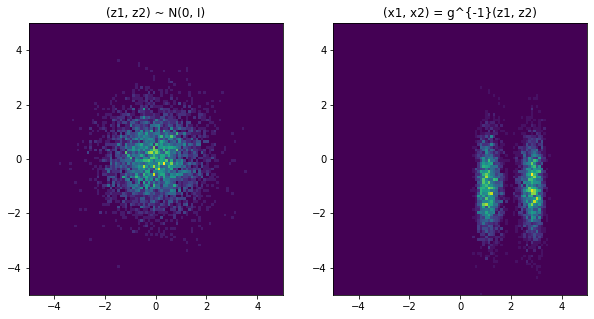

In [197]:
# Plotting for sanity check!

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.hist2d(z_pairs[:,0], z_pairs[:,1], bins=100, range=[(-5,5), (-5,5)], density=True)
ax1.set_xlim(-5, 5)
ax1.set_ylim(-5, 5)
ax1.set_title('(z1, z2) ~ N(0, I)')

ax2.hist2d(x_pairs[:,0], x_pairs[:,1], bins=100, range=[(-5,5), (-5,5)], density=True)
ax2.set_xlim(-5, 5)
ax2.set_ylim(-5, 5)
ax2.set_title('(x1, x2) = g^{-1}(z1, z2)')

plt.show()

We use the following equation to calculate the log-likelihood of (x1, x2) observations:

$\log p(\mathbf{x})=\log p(g(\mathbf{x}))+\log \left|\operatorname{det} J_{g(\mathbf{x})}\right|$

In [198]:
# Calculate log-likelihood of (x1, x2) observations
mu_z = np.zeros(2)
cov_z = np.eye(2)

# Required function definitions
J = jacfwd(g_fwd)
J_vec = vmap(J, (0, None), 0)
det_vec = vmap(np.linalg.det)

# log p(x) from the change of variabled formula
print("log p(x) =", multivariate_normal.logpdf(g_fwd_vec(x_pairs, params), 
                                               mean=np.zeros(2), 
                                               cov=np.eye(2)) + 
                    np.log(np.abs(det_vec(J_vec(x_pairs, params)))))

log p(x) = [-2.3041358 -3.2910194 -2.6540308 ... -2.4160042 -4.2445364 -1.5949955]


In [199]:
# Define loss
@jit
def loss(params, batch):
    return -np.mean(multivariate_normal.logpdf(g_fwd_vec(batch, params), 
                                               mean=np.zeros(2), 
                                               cov=np.eye(2)) + 
                    np.log(np.abs(det_vec(J_vec(batch, params)))))

# Define gradient of loss
grad_loss = grad(loss)

In [200]:
x_pairs.shape

(5000, 2)

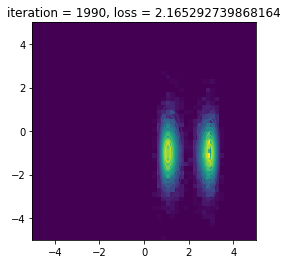

[ 0.9907498  -5.964101   11.97014    -8.00127     0.99341226  0.9931726 ]


In [219]:
# Initial guess for the unkown parameters
params = np.array([1, -5.96, 11.9, -8.1, 1.1, 0.95])
batch = x_pairs

# Define a learning rate parameter
lr = 0.002

# Define the gradient descent step
def step(params, batch):
    grads = grad_loss(params, batch)
    params = tree_map(lambda x, g: x - lr*g, params, grads)
    return params

for i in range(2000):
    params = step(params, batch)
    
    # Show progress
    if i % 10 == 0:
        clear_output(wait=True)
        plt.figure(figsize=(4, 4))
        plt.title("iteration = {}, loss = {}".format(i, loss(params, batch)))
        
        plt.hist2d(batch[:, 0], batch[:, 1], bins=50, range=[(-5,5), (-5,5)], density=True)
        plt.xlim(-5, 5)
        plt.ylim(-5, 5)

        x = np.arange(-5.0, 5.0, 0.05)
        y = np.arange(-5.0, 5.0, 0.05)
        X, Y = np.meshgrid(x, y)
        shape = X.shape
        grid = np.hstack([X.reshape(-1, 1), Y.reshape(-1, 1)])
        Z = np.exp(multivariate_normal.logpdf(g_fwd_vec(grid, params), 
                                              mean=np.zeros(2), 
                                              cov=np.eye(2)) + np.log(np.abs(det_vec(J_vec(grid, params)))))
        Z = Z.reshape(shape)
        CS = plt.contour(X, Y, Z, levels=10, lw=2)

        plt.show()
        print(params)